In [ ]:
from pyquery import PyQuery as pq
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import pickle
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

***YAPAY SİNİR AĞI KÜTÜPHANELERİ***

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras import Sequential
import tensorflow as tf
from sklearn.metrics import classification_report, accuracy_score

***ÖN İŞLEM KÜTÜPHANELERİ***

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

# ***BURADA KENDİ VERİ SETİMİZİ OLUŞTURDUK.***

In [ ]:
arabalistesi=[]

In [ ]:
for sayfano in range(1,6):
  p=pq("https://www.sahibinebak.com/vasita/otomobil/fiat-57?page="+str(sayfano))
  for i in p(".searchResultsItem.even.searchResultsPromoHighlight.searchResultsPromoBold.searchResultsFireSale").items():
    liste=[j.text() for j in i("td").items()]
    araba={}    
    araba["seri"]=liste[1]
    if not liste[4]:
      continue
    else:
      araba["model_yili"]=int(liste[4])
    if not liste[5]:
      continue
    else:
      araba["km"]=int(liste[5].replace(".","").replace(" ","").replace("205bin","205000"))
    araba["renk"]=liste[6]
    araba["fiyat"]=int(liste[7][:-3].replace(".",""))
    arabalistesi.append(araba)

In [ ]:
verimustafa=pd.DataFrame(arabalistesi) #veri seti haline getirme

In [ ]:
verimustafa

,seri,model_yili,km,renk,fiyat
0,Linea,2017,75000,Beyaz,119000
1,Punto,2007,265000,Bordo,57000
2,Linea,2011,260000,Gri,85000
3,Linea,2012,222500,Beyaz,74500
4,Linea,2014,121000,Gümüş Gri,93500
...,...,...,...,...,...
68,Linea,2014,385000,Beyaz,29123
69,Marea,2000,209400,Bej,18000
70,Egea,2019,2000,Beyaz,85000
71,Uno,2000,150000,Beyaz,12500


In [ ]:
len(arabalistesi)

73

***Yıl ve KM değerlerini -1,1 arasında denk gelen değere yazdırıyoruz***

In [ ]:
#yıl için
scyil=MinMaxScaler()
verimustafa["model_yili"]=scyil.fit_transform(verimustafa["model_yili"].values.reshape(-1,1))
#km için
sckm=MinMaxScaler()
verimustafa["km"]=scyil.fit_transform(verimustafa["km"].values.reshape(-1,1))

In [ ]:
verimustafa

,seri,model_yili,km,renk,fiyat
0,Linea,0.884615,0.194617,Beyaz,119000
1,Punto,0.500000,0.688239,Bordo,57000
2,Linea,0.653846,0.675249,Gri,85000
3,Linea,0.692308,0.577823,Beyaz,74500
4,Linea,0.769231,0.314125,Gümüş Gri,93500
...,...,...,...,...,...
68,Linea,0.769231,1.000000,Beyaz,29123
69,Marea,0.230769,0.543789,Bej,18000
70,Egea,0.961538,0.004962,Beyaz,85000
71,Uno,0.230769,0.389468,Beyaz,12500


In [ ]:
verimustafa["renk"].value_counts() #değer sayıları

Beyaz         26
Gümüş Gri      8
Gri            7
Yeşil          5
Mavi           4
Siyah          3
Kırmızı        3
Bej            3
Bordo          3
Füme           3
               3
Lacivert       2
Kahverengi     1
Turkuaz        1
Sarı           1
Name: renk, dtype: int64

***RENK BEYAZSA 1, DEĞİLSE 0 DÖNDÜR***

In [ ]:
def renkata(deger):
  if deger!="Beyaz":
    return 0
  else:
    return 1

In [ ]:
verimustafa["renk"]=verimustafa["renk"].apply(renkata)

In [ ]:
verimustafa

,seri,model_yili,km,renk,fiyat
0,Linea,0.884615,0.194617,1,119000
1,Punto,0.500000,0.688239,0,57000
2,Linea,0.653846,0.675249,0,85000
3,Linea,0.692308,0.577823,1,74500
4,Linea,0.769231,0.314125,0,93500
...,...,...,...,...,...
68,Linea,0.769231,1.000000,1,29123
69,Marea,0.230769,0.543789,0,18000
70,Egea,0.961538,0.004962,1,85000
71,Uno,0.230769,0.389468,1,12500


***VERİLERİ SİTEDEN BAZEN 65'E KADAR BAZEN 100 ÜZERİ DEĞERE KADAR ÇEKİYOR. HATA ALMAMAK GARANTİ SONUÇ ALMAK İÇİN 60 ÜZERİNDEN İŞLEM YAPTIM!***

In [ ]:
egitim=verimustafa[:60]
test=verimustafa[60:]

In [ ]:
len(test)

13

***EĞİTİM VE TEST İÇİN GEREKLİ OLAN DEĞERLERİ ALIYORUZ***

In [ ]:
trainX=egitim[["model_yili","km","renk"]].values
trainY=egitim["fiyat"].values

testX=test[["model_yili","km","renk"]].values
testY=test["fiyat"].values

***fit komutu ile eğitim yaptık. ***

In [ ]:
t=LinearRegression()
t.fit(trainX,trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predictY=t.predict(testX)

In [ ]:
for i,j in zip(testY,predictY):
  print(i,j)

77750 78615.020368382
47500 63334.48960941723
29500 53985.34790561516
39750 63950.41679495898
23000 17693.866098885606
85000 89420.38991800063
17500 11759.783272604038
18500 11747.474987288842
29123 55001.380653844884
18000 19033.754650697854
85000 89420.38991800063
12500 16146.954884015628
19000 41327.79731947326


***HEM TAHMİNİ HEM GERÇEK FİYATI YANYANA YAZDIRDIK. 60'DAN EN SON DEĞERE KADAR TEST İÇİN KULLAN DEDİK.***

In [ ]:
tahmin=pd.DataFrame(predictY,columns=["tahmin"], index=range(60,len(verimustafa)))

In [ ]:
pd.concat([test,tahmin],axis=1)

,seri,model_yili,km,renk,fiyat,tahmin
60,Egea,0.846154,0.020550,1,77750,78615.020368
61,Palio,0.653846,0.210205,0,47500,63334.489609
62,Albea,0.538462,0.139799,0,29500,53985.347906
63,Panda,0.653846,0.173833,0,39750,63950.416795
64,Tipo,0.115385,0.000416,0,23000,17693.866099
65,Egea,0.961538,0.004962,1,85000,89420.389918
66,Brava,0.153846,0.558338,0,17500,11759.783273
67,Palio,0.230769,0.649269,1,18500,11747.474987
68,Linea,0.769231,1.000000,1,29123,55001.380654
69,Marea,0.230769,0.543789,0,18000,19033.754651


***ŞU ANA KADAR OLAN VERİLERİ KAYDET!!!***

In [ ]:
dosya=open("verimustafa.pckl","wb")
pickle.dump(verimustafa,dosya)

***KAYDEDİLEN VERİYİ OKUR, YEDEK VERİ !!!!***

In [ ]:
dosya2=open("verimustafa.pckl","rb")
verimustafayedek=pickle.load(dosya2)

***BURADA VERİ YEDEK'E YENİ DEĞERLER ATANIYOR!!! ÖNEMLİ OLMAZSA HATA ALIYORUM.***

In [ ]:
normalizec=["fiyat","renk"]
clist={}
for i in normalizec:
  clist[i]=MinMaxScaler()
  verimustafayedek[i]=clist[i].fit_transform(verimustafayedek[i].values.reshape(-1,1))

In [ ]:
verimustafayedek.pop("seri") #bu olursa yani silinmezse float hatası veriyor

0     Linea
1     Punto
2     Linea
3     Linea
4     Linea
      ...  
68    Linea
69    Marea
70     Egea
71      Uno
72    Palio
Name: seri, Length: 73, dtype: object

In [ ]:
verimustafayedek

,model_yili,km,renk,fiyat
0,0.884615,0.194617,1.0,0.741433
1,0.500000,0.688239,0.0,0.355140
2,0.653846,0.675249,0.0,0.529595
3,0.692308,0.577823,1.0,0.464174
4,0.769231,0.314125,0.0,0.582555
...,...,...,...,...
68,0.769231,1.000000,1.0,0.181452
69,0.230769,0.543789,0.0,0.112150
70,0.961538,0.004962,1.0,0.529595
71,0.230769,0.389468,1.0,0.077882


# **FARKLI TAHMİN YÖNTEMİ **

In [ ]:
y=verimustafayedek.pop("fiyat")

In [ ]:
trainx2=verimustafayedek[0:60].values
trainy2=y[0:60].values

testx2=verimustafayedek[60:].values
testy2=y[60:].values

In [ ]:
tlist={}

In [ ]:
slist={}

***BURADAKİ DEĞERLERİ DEĞİŞTİREBİLİRİZ. ÇÜNKÜ TEST SONUÇLARINA DİREK ETKİSİ VAR!!!***

In [ ]:
tlist["tkararagaci"]=DecisionTreeRegressor(min_samples_split=10,min_samples_leaf=5)
tlist["trastgeleorman"]=RandomForestRegressor(min_samples_split=10,min_samples_leaf=5)
tlist["tknn"]=KNeighborsRegressor()

In [ ]:
for i in tlist:
  tlist[i].fit(trainx2,trainy2)
  slist[i]=tlist[i].predict(testx2)

In [ ]:
clist["fiyat"].inverse_transform

<bound method MinMaxScaler.inverse_transform of MinMaxScaler(copy=True, feature_range=(0, 1))>

In [ ]:
for i in slist:
  slist[i]=clist["fiyat"].inverse_transform(slist[i].reshape(-1,1))

In [ ]:
gerceky=clist["fiyat"].inverse_transform(testy2.reshape(-1,1))

In [ ]:
c=pd.DataFrame(data=range(60,len(verimustafayedek)),index=range(60,len(verimustafayedek))) #test için kaç veri ayrıldıysa range değeri o

In [ ]:
for i in slist:
  c[i]=pd.DataFrame(data=slist[i],index=range(60,len(verimustafayedek)))

In [ ]:
c["gercek"]=pd.DataFrame(data=gerceky,index=range(60,len(verimustafayedek)))

In [ ]:
c

,0,tkararagaci,trastgeleorman,tknn,gercek
60,60,90156.250000,97011.350519,95650.0,77750.0
61,61,28916.666667,38668.166890,70840.0,47500.0
62,62,28916.666667,33091.907893,55290.0,29500.0
63,63,28916.666667,38668.166890,67840.0,39750.0
64,64,18756.250000,16396.552270,19810.0,23000.0
65,65,90156.250000,98896.885440,79970.0,85000.0
66,66,10077.571429,14751.661007,18102.4,17500.0
67,67,22123.333333,23195.217633,42350.0,18500.0
68,68,90156.250000,92131.420562,42350.0,29123.0
69,69,22123.333333,20769.873704,18752.4,18000.0


# ***KÜMELEME ALGORİTMASI VE KULLANIMI***

***VERİMUSTAFA'YI KAYDET!!!***

In [ ]:
dosyayedek=open("verimustafayedek.pckl","wb")
pickle.dump(verimustafa,dosyayedek)

***VERİMUSTAFA'YI OKU***

In [ ]:
dosyayedek2=open("verimustafayedek.pckl","rb")
verimustafayedek2=pickle.load(dosyayedek2)

In [ ]:
verimustafayedek2.pop("seri") #string veriyi siliyoruz

0     Linea
1     Punto
2     Linea
3     Linea
4     Linea
      ...  
68    Linea
69    Marea
70     Egea
71      Uno
72    Palio
Name: seri, Length: 73, dtype: object

In [ ]:
k=KMeans(n_clusters=13) #on uc cesit fiat araba markası var, ayırsın diye
k.fit_transform(verimustafayedek2)

array([[3.00000002e+03, 9.93806667e+04, 6.10000000e+04, 3.18750000e+04,
        1.18976167e+05, 8.21400000e+04, 4.15000000e+04, 1.04327778e+05,
        4.25833333e+04, 1.60000000e+04, 8.95314167e+04, 8.42500001e+03,
        7.42500000e+04],
       [5.90000000e+04, 3.73806667e+04, 1.00000002e+03, 3.01250000e+04,
        5.69761667e+04, 2.01400000e+04, 1.03500000e+05, 4.23277778e+04,
        1.94166667e+04, 4.60000000e+04, 2.75314167e+04, 7.04250000e+04,
        1.22500000e+04],
       [3.10000000e+04, 6.53806667e+04, 2.70000000e+04, 2.12500011e+03,
        8.49761667e+04, 4.81400000e+04, 7.55000000e+04, 7.03277778e+04,
        8.58333338e+03, 1.80000000e+04, 5.55314167e+04, 4.24250000e+04,
        4.02500000e+04],
       [4.15000000e+04, 5.48806667e+04, 1.65000000e+04, 1.26250000e+04,
        7.44761667e+04, 3.76400000e+04, 8.60000000e+04, 5.98277778e+04,
        1.91666669e+03, 2.85000000e+04, 4.50314167e+04, 5.29250000e+04,
        2.97500000e+04],
       [2.25000000e+04, 7.38806667e+

In [ ]:
sonuclaryedek=k.transform(verimustafayedek2.values)

In [ ]:
k.labels_

array([ 0,  2,  3,  8,  3, 10,  0, 10, 11,  7,  5,  7,  8,  5,  4,  5,  5,
        5,  4,  7,  4,  7, 10,  1, 10,  4,  1,  1, 10,  1,  0,  5, 11, 10,
        5,  1,  1,  1,  1,  4,  7,  9,  1, 10,  2,  5,  1,  7,  9,  4,  8,
       10, 10,  6,  8, 12,  7,  7,  8, 10,  8, 12, 10,  5,  1,  3,  1,  1,
       10,  1,  3,  7,  1], dtype=int32)

In [ ]:
verimustafayedek2=pd.concat([verimustafayedek2,pd.DataFrame(k.labels_,columns=["KümeNo"])], axis=1)

In [ ]:
verimustafayedek2

,model_yili,km,renk,fiyat,KümeNo
0,0.884615,0.194617,1,119000,0
1,0.500000,0.688239,0,57000,2
2,0.653846,0.675249,0,85000,3
3,0.692308,0.577823,1,74500,8
4,0.769231,0.314125,0,93500,3
...,...,...,...,...,...
68,0.769231,1.000000,1,29123,10
69,0.230769,0.543789,0,18000,1
70,0.961538,0.004962,1,85000,3
71,0.230769,0.389468,1,12500,7


In [ ]:
#adjusted_rand_score(verimustafayedek2["KümeNo"],k.labels_) #yuzde kac basarısı var ona bakıyor

In [ ]:
ak=AgglomerativeClustering(n_clusters=13,linkage="complete",affinity="manhattan")
ak.fit(verimustafayedek2)

AgglomerativeClustering(affinity='manhattan', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=13)

In [ ]:
ak.labels_

array([ 3,  8,  2, 10,  0,  4,  3,  4,  5,  6,  1,  6,  2,  1,  7,  1,  1,
        1,  7,  6,  7,  6,  4,  6,  4,  7, 12, 12,  4, 12,  3,  1,  5,  4,
        1,  6,  6,  6,  6,  7,  6,  0, 12,  4,  8,  1, 12,  6,  0,  7,  2,
        4,  4,  9, 10,  1,  6,  6,  2,  4,  2, 11,  4,  1, 12,  2,  6,  6,
        4,  6,  2,  6,  6])

In [ ]:
#kume no yazan yere aslında target yazılır. fakat bizde onceden belirli veri olmadıgı için deneme amacli yapıyoruz
#adjusted_rand_score(verimustafayedek2["KümeNo"],k.labels_) #yuzde kac basarısı var ona bakıyor

# ***SINIFLANDIRMA İŞLEMLERİ***

In [ ]:
for i in verimustafayedek2.columns[:-1]:
  verimustafayedek2[i]=MinMaxScaler().fit_transform(verimustafayedek2[i].values.reshape(-1,1))

In [ ]:
verimustafayedek2

,model_yili,km,renk,fiyat,KümeNo
0,0.884615,0.194617,1.0,0.741433,0
1,0.500000,0.688239,0.0,0.355140,2
2,0.653846,0.675249,0.0,0.529595,3
3,0.692308,0.577823,1.0,0.464174,8
4,0.769231,0.314125,0.0,0.582555,3
...,...,...,...,...,...
68,0.769231,1.000000,1.0,0.181452,10
69,0.230769,0.543789,0.0,0.112150,1
70,0.961538,0.004962,1.0,0.529595,3
71,0.230769,0.389468,1.0,0.077882,7


In [ ]:
y=verimustafayedek2["KümeNo"].values
#x=verimustafayedek2[verimustafayedek2.columns[:-1]].values
x=verimustafayedek2.iloc[:,:-1].values

***BURADA TRAİN VE TEST YERLERİNİ DÜZGÜN YAZMAK LAZIM YOKSA HATA VERİYOR, SIRALAMASI ÖNEMLİ !!!***

In [ ]:
trainx3,testx3,trainy3,testy3= train_test_split(x,y,test_size=0.2)

In [ ]:
knnDeneme=KNeighborsClassifier(n_neighbors=5)
knnDeneme.fit(trainx3,trainy3)
predy=knnDeneme.predict(testx3)

In [ ]:
for i,j in zip(predy,testy3):
  print(i,j)

9 11
5 4
8 10
10 10
1 1
10 10
1 1
0 3
1 1
1 10
9 0
0 6
7 7
1 1
5 12


***UZAKLIK HESAPLA***

In [ ]:
def anahtar(eleman):
  return eleman["uzaklik"]

In [ ]:
def uzaklik(a,b):
  toplam = 0
  for i in range(len(a)):
    toplam +=(a[i]-b[i])**2
  return toplam**0.5

In [ ]:
uzaklik(testx3[0],trainx3[1])

1.3267468309984596

In [ ]:
uzakliklistesi=[]
for i in range(len(trainx3)):
  #print(uzaklik([testx3[0]],[trainx3[i]]),trainy3[i])
  uzakliklistesi.append({"uzaklik":uzaklik(testx3[0],trainx3[i]), "sinif":trainy3[i]})

In [ ]:
#uzakliklistesi.sort(key=anahtar)
#uzakliklistesi[:5]

In [ ]:
#pd.DataFrame(uzakliklistesi[:3]).groupby("sinif").count().idxmax()[0]
pd.DataFrame(uzakliklistesi[:3]).groupby("sinif").count()

,uzaklik
sinif,
3,1
4,1
10,1


# ***KNN KODLAMA***

In [ ]:
uzakliklistesi

[{'sinif': 3, 'uzaklik': 0.3141404584126562},
 {'sinif': 10, 'uzaklik': 1.3267468309984596},
 {'sinif': 4, 'uzaklik': 1.548550410144984},
 {'sinif': 3, 'uzaklik': 0.3141404584126562},
 {'sinif': 7, 'uzaklik': 1.1403892117253085},
 {'sinif': 1, 'uzaklik': 1.3879092349219775},
 {'sinif': 10, 'uzaklik': 1.2117010183908696},
 {'sinif': 4, 'uzaklik': 1.4719908840358935},
 {'sinif': 8, 'uzaklik': 0.4523142560671323},
 {'sinif': 1, 'uzaklik': 1.3879092349219775},
 {'sinif': 10, 'uzaklik': 1.5094389172234062},
 {'sinif': 7, 'uzaklik': 1.0042879855334248},
 {'sinif': 8, 'uzaklik': 0.29384489246325557},
 {'sinif': 10, 'uzaklik': 0.6329870453489214},
 {'sinif': 10, 'uzaklik': 1.4373289509260603},
 {'sinif': 4, 'uzaklik': 0.8176089192699578},
 {'sinif': 5, 'uzaklik': 1.4134319783771583},
 {'sinif': 2, 'uzaklik': 1.2531916194213393},
 {'sinif': 8, 'uzaklik': 0.5315752914936798},
 {'sinif': 1, 'uzaklik': 1.034517654783623},
 {'sinif': 8, 'uzaklik': 1.1239922416930013},
 {'sinif': 8, 'uzaklik': 0.331

In [ ]:
k=5
dogrusayaci=0
tahminlistesi=[]
for testno in range(len(testx3)):
  uzakliklistesi= []
  for egitimno in range(len(trainx3)):
    d=uzaklik([testx3[testno]],[trainx3[egitimno]])
    uzakliklistesi.append({"uzaklik":d,"sinif":trainy3[egitimno]})
  #uzakliklistesi.sort(key=anahtar)
  sonuc=pd.DataFrame(uzakliklistesi[:k]).groupby("sinif").count().idxmax()[0]
  print("tahmin: [{}], Gercek: [{}]".format(sonuc,testy3[testno]))
  if sonuc==testy3[testno]:
    dogrusayaci+=1
  tahminlistesi.append(sonuc)

tahmin: [3], Gercek: [11]
tahmin: [3], Gercek: [4]
tahmin: [3], Gercek: [10]
tahmin: [3], Gercek: [10]
tahmin: [3], Gercek: [1]
tahmin: [3], Gercek: [10]
tahmin: [3], Gercek: [1]
tahmin: [3], Gercek: [3]
tahmin: [3], Gercek: [1]
tahmin: [3], Gercek: [10]
tahmin: [3], Gercek: [0]
tahmin: [3], Gercek: [6]
tahmin: [3], Gercek: [7]
tahmin: [3], Gercek: [1]
tahmin: [3], Gercek: [12]


In [ ]:
print("toplam test ornegi ->"+str(len(testx3)))
print("basarili siniflandirma sayaci ->"+str(dogrusayaci))
print("yuzde kac basari -> %"+str(100*(dogrusayaci/len(testx3))))

toplam test ornegi ->15
basarili siniflandirma sayaci ->1
yuzde kac basari -> %6.666666666666667


In [ ]:
confusion_matrix(testy3,tahminlistesi)

array([[0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 4, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 4, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0]])

# ***YAPAY SİNİR AĞLARI KODLARI***

In [ ]:
y=verimustafayedek2["KümeNo"].values
x=verimustafayedek2[verimustafayedek2.columns[:-1]].values

In [ ]:
trainx4,testx4,trainy4,testy4=train_test_split(x,y,test_size=0.2)

In [ ]:
model=Sequential()
model.add(Dense(13,activation="relu",input_shape=[4]))
model.add(Dense(512,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",metrics=["accuracy"],loss="binary_crossentropy")

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 13)                65        
_________________________________________________________________
dense_21 (Dense)             (None, 512)               7168      
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_23 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 257       
Total params: 401,474
Trainable params: 401,474
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(trainx4,trainy4,epochs=20)

Epoch 1/20
2/2 [==============================] - 1s 16ms/step - loss: 0.3641 - accuracy: 0.1117
Epoch 2/20
2/2 [==============================] - 0s 14ms/step - loss: -2.2145 - accuracy: 0.1659
Epoch 3/20
2/2 [==============================] - 0s 10ms/step - loss: -5.6094 - accuracy: 0.1451
Epoch 4/20
2/2 [==============================] - 0s 16ms/step - loss: -10.5959 - accuracy: 0.1764
Epoch 5/20
2/2 [==============================] - 0s 13ms/step - loss: -18.0657 - accuracy: 0.1555
Epoch 6/20
2/2 [==============================] - 0s 10ms/step - loss: -30.4303 - accuracy: 0.1243
Epoch 7/20
2/2 [==============================] - 0s 20ms/step - loss: -46.7073 - accuracy: 0.1451
Epoch 8/20
2/2 [==============================] - 0s 11ms/step - loss: -69.4427 - accuracy: 0.1451
Epoch 9/20
2/2 [==============================] - 0s 10ms/step - loss: -101.1167 - accuracy: 0.1347
Epoch 10/20
2/2 [==============================] - 0s 10ms/step - loss: -139.0299 - accuracy: 0.1451
Epoch 11/20

***TENSORFLOW KULLANARAK İNPUT_SHAPE SORUNU KALDIRILDI!***

In [ ]:
tf.function(experimental_relax_shapes=True)

<function tensorflow.python.eager.def_function.function.<locals>.decorated>

In [ ]:
predy2=model.predict(testx4)

In [ ]:
predy_binary=[]
for i in predy2:
  predy_binary.append(int(round(i[0],0)))

In [ ]:
predy_binary

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
accuracy_score(testy4,predy_binary)

0.4

In [ ]:
classification_report(testy4,predy_binary)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           1       0.40      1.00      0.57         6\n           3       0.00      0.00      0.00         1\n           4       0.00      0.00      0.00         2\n           7       0.00      0.00      0.00         2\n           8       0.00      0.00      0.00         1\n          10       0.00      0.00      0.00         2\n          11       0.00      0.00      0.00         1\n\n    accuracy                           0.40        15\n   macro avg       0.06      0.14      0.08        15\nweighted avg       0.16      0.40      0.23        15\n'

In [ ]:
confusion_matrix(testy4,predy_binary)

array([[6, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0]])

In [ ]:
predy3=model.predict(trainx4)
predy_binary2=[]
for i in predy2:
  predy_binary2.append(int(round(i[0],0)))
accuracy_score(testy4,predy_binary2)

0.4

In [ ]:
knn2=KNeighborsClassifier(n_neighbors=5)
knn2.fit(trainx4,trainy4)
ypredknn= knn2.predict(testx4)

In [ ]:
confusion_matrix(testy4,ypredknn)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0]])

# **ÖN İŞLEM KODLARI**

***İmputation - Eksik Alanları Tamamlama (GENERAL_DAM_OCCUPANCY_RATE kolonu için)***

In [ ]:
verimustafa

,seri,model_yili,km,renk,fiyat
0,Linea,0.884615,0.194617,1,119000
1,Punto,0.500000,0.688239,0,57000
2,Linea,0.653846,0.675249,0,85000
3,Linea,0.692308,0.577823,1,74500
4,Linea,0.769231,0.314125,0,93500
...,...,...,...,...,...
68,Linea,0.769231,1.000000,1,29123
69,Marea,0.230769,0.543789,0,18000
70,Egea,0.961538,0.004962,1,85000
71,Uno,0.230769,0.389468,1,12500


In [ ]:
seri=verimustafa["seri"]
modelyili=verimustafa["model_yili"]
km=verimustafa["km"]
renk=verimustafa["renk"]
fiyat=verimustafa["fiyat"]

In [ ]:
boslaridoldur=SimpleImputer()

In [ ]:
seriyatay=seri.values
modelyiliyatay=modelyili.values
kmyatay=km.values

In [ ]:
seridikey=seri.values.reshape(-1,1)
modelyilidikey=modelyili.values.reshape(-1,1)
kmdikey=km.values.reshape(-1,1)

In [ ]:
boslaridoldur.fit(modelyili.values.reshape(-1,1))

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [ ]:
modelyilidolu=boslaridoldur.transform(modelyili.values.reshape(-1,1))

In [ ]:
verimustafa.pop("model_yili")

0     0.884615
1     0.500000
2     0.653846
3     0.692308
4     0.769231
        ...   
68    0.769231
69    0.230769
70    0.961538
71    0.230769
72    0.423077
Name: model_yili, Length: 73, dtype: float64

In [ ]:
modelyiliDF=pd.DataFrame(data=modelyilidolu, columns=["model_yili"], index=range(0,len(verimustafa)))

In [ ]:
verimustafa=pd.concat([verimustafa,modelyiliDF], axis=1)

***LabelEncoding***

In [ ]:
seridelete=verimustafa.pop("seri")

In [ ]:
basitkodlayici=LabelEncoder()

In [ ]:
seriKodlanmisHali=basitkodlayici.fit_transform(seri.values)

In [ ]:
seriKodlanmisHali=seriKodlanmisHali.reshape(-1,1)

In [ ]:
seriKodlanmisHaliDF=pd.DataFrame(data=seriKodlanmisHali,columns=["seri"],index=range(0,len(verimustafa)))

In [ ]:
verimustafa=pd.concat([verimustafa,seriKodlanmisHaliDF],axis=1)

In [ ]:
verimustafa

,km,renk,fiyat,model_yili,seri
0,0.194617,1,119000,0.884615,3
1,0.688239,0,57000,0.500000,7
2,0.675249,0,85000,0.653846,3
3,0.577823,1,74500,0.692308,3
4,0.314125,0,93500,0.769231,3
...,...,...,...,...,...
68,1.000000,1,29123,0.769231,3
69,0.543789,0,18000,0.230769,4
70,0.004962,1,85000,0.961538,2
71,0.389468,1,12500,0.230769,11


***One Hot Encoder***

In [ ]:
renkDelete=verimustafa.pop("renk")

In [ ]:
SahteKodlayici= OneHotEncoder()

In [ ]:
renkKodlanmisHali=SahteKodlayici.fit_transform(renk.values.reshape(-1,1)).toarray()

In [ ]:
#renkDF=pd.DataFrame(data=renkKodlanmisHali,columns=["renk"],index=range(0,len(verimustafa)))

***Yeni Öznitelik Oluşturma***

In [ ]:
df=pd.DataFrame(verimustafa)
price=pd.to_datetime(df['model_yili'])
df['yeni_model_yili']=price.dt.year

In [ ]:
df

,km,fiyat,model_yili,seri,yeni_model_yili
0,0.194617,119000,0.884615,3,1970
1,0.688239,57000,0.500000,7,1970
2,0.675249,85000,0.653846,3,1970
3,0.577823,74500,0.692308,3,1970
4,0.314125,93500,0.769231,3,1970
...,...,...,...,...,...
68,1.000000,29123,0.769231,3,1970
69,0.543789,18000,0.230769,4,1970
70,0.004962,85000,0.961538,2,1970
71,0.389468,12500,0.230769,11,1970


In [ ]:
x=df[['model_yili']].values.astype(float)

In [ ]:
min_max_scaler=preprocessing.MinMaxScaler()

In [ ]:
x_scaled = min_max_scaler.fit_transform(x)

In [ ]:
df['model_yili_2_olcek'] = pd.DataFrame(x_scaled)

In [ ]:
df

,km,fiyat,model_yili,seri,yeni_model_yili,model_yili_2_olcek
0,0.194617,119000,0.884615,3,1970,0.884615
1,0.688239,57000,0.500000,7,1970,0.500000
2,0.675249,85000,0.653846,3,1970,0.653846
3,0.577823,74500,0.692308,3,1970,0.692308
4,0.314125,93500,0.769231,3,1970,0.769231
...,...,...,...,...,...,...
68,1.000000,29123,0.769231,3,1970,0.769231
69,0.543789,18000,0.230769,4,1970,0.230769
70,0.004962,85000,0.961538,2,1970,0.961538
71,0.389468,12500,0.230769,11,1970,0.230769


***Aykırı veri tespit etme...***

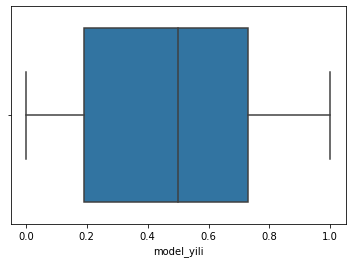

In [ ]:
sns.boxplot(x=df['model_yili'])